# US YouTube Trending Video

## Latar Belakang
Youtube merupakan salah satu platform digital yang berbasis video dengan skala terbesar di dunia. Dengan banyaknya video yang ada, sebuah brand harus memiliki strategi tertentu dalam pembuatan sebuah konten video agar tercipta interaksi dengan pengguna yang nantinya dapat mendatangkan views, like, dan komen yang dapat menjadikan sebuah video menjadi trending. Akan tetapi untuk menjadikan sebuah konten video menjadi trending, diperlukan strategi terukur dengan melakukan analisis faktor-faktor yang saling mempengaruhi. 


## Pernyataan Masalah

Trending merupakan fitur yang dibuat oleh youtube untuk menampilkan video yang sedang populer di youtube dan di seluruh dunia. Trending juga bertujuan untuk menampilkan video yang menarik dan banyak penonton. Beberapa tren dapat diprediksi.

Apa yang menentukan pemberian peringkat video di Trending? Di antara banyak video baru yang bagus di YouTube pada hari tertentu, hanya sejumlah video tertentu saja yang bisa muncul di Trending. Tujuan tab Trending adalah menampilkan video yang:
- Dianggap menarik oleh cakupan penonton yang luas
- Tidak menyesatkan, bersifat clickbait, atau sensasional
- Memperlihatkan keragaman peristiwa yang sedang terjadi di YouTube dan di seluruh dunia
- Menampilkan keragaman kreator
- Idealnya, video yang mengejutkan atau benar-benar baru

Sebagai Data Analyst, kita akan mencoba menjawab beberapa pertanyaan berikut ini:
1. Bagaimanakah karakteristik dari kategori video, channel ataupun video yang menjadi trending, dan faktor apa sajakah yang mempengaruhi hal tersebut?
2. Channel youtube mana yang memiliki video trending paling banyak, likes, komentar, dan dislikes?
3. Video manakah yang memiliki paling banyak, likes, komentar, dan dislikes?
4. Kategori video manakah yang mempunyai peringkat tertinggi dari banyak, likes, komentar, dan dislikes?
5. Seberapa tinggi tingkat korelasi antara views, komentar dan likes?
6. Keyword yang paling sering digunakan pada tags dan judul video?

## Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import ticker
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

## Access & Show Insight CSV Dataset

In [2]:
# Mengakses data csv
df_csv = pd.read_csv('USvideos.csv')
df_csv.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
df_csv.head(1).transpose()

,0
video_id,2kyS6SvSYSE
trending_date,17.14.11
title,WE WANT TO TALK ABOUT OUR MARRIAGE
channel_title,CaseyNeistat
category_id,22
publish_time,2017-11-13T17:13:01.000Z
tags,SHANtell martin
views,748374
likes,57527
dislikes,2966



#### Dataset Information

Dataset ini berisi informasi tentang trending youtube di US yang berisi 16 kolom, berikut masing-masing keterangan dari kolom yang ada dalam dataset:

1. video_id : ID video yang dimiliki oleh masing-masing video
2. trending_date : Tanggal kapan video tersebut masuk list trending
3. title : Judul Video
4. channel_title : Nama Channel Youtube
5. category_id : Nomor Kategori ID
6. publish_time : Waktu Upload Video
7. tags : Tags atau keyword yang terdapat dalam video
8. views : Jumlah views pada saat masuk list trending (hari trending)
9. likes : Jumlah likes pada saat masuk list trending (hari trending)
10. dislikes : Jumlah dislikes pada saat trending (hari trending)
11. comment_count : Jumlah komentar pada video saat trending (hari trending)
12. thumbnail_link : Link gambar thumbnail video
14. comments_disabled : Pengaturan komentar video (Komentar dimatikan/tidak)
15. rating disabled : Pengaturan like dan dislikes video (dimatikan/tidak)
16. video_error_or_removed	: Video yang error atau telah dihapus
17. description : Deskripsi pada video



In [4]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [5]:
display(df_csv.describe(),df_csv.describe(include='object'))

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40379
unique,6351,205,6455,2207,6269,6055,6352,6901
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,30,200,30,203,50,1535,30,58


Dari kolom deskripsi dapat dilihat bahwa terdapat 40379 video, dengan kata lain sebanyak 570 (40949-40379) tidak memiliki deskripsi video. Channel ESPN memiliki frekuensi trending paling tinggi dengan 203 kali masuk list trending. Video dengan category Enterntainment memiliki jumlah video yang paling banyak masuk list trending dibanding video lain. Video dengan judul WE MADE OUR MOM CRY...HER DREAM CAME TRUE! memiliki frekuensi trending paling banyak dibanding video lain dengan 30 kali masuk list trending.

## Access & Show Insight JSON Dataset

Untuk mengekstrak category id dan category

In [6]:
# Untuk menampilkan isi kolom keseluruhan
pd.set_option('display.max_colwidth', None)   
# Membuka file JSON
df_json = pd.read_json('US_category_id.json')
df_json.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ""', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}"
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA""', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}"
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg""', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}"
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI""', 'id': '15', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Pets & Animals', 'assignable': True}}"
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM1XVQ9zbGec""', 'id': '17', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Sports', 'assignable': True}}"


In [7]:
# Pengecekan tipe data
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   kind    32 non-null     object
 1   etag    32 non-null     object
 2   items   32 non-null     object
dtypes: object(3)
memory usage: 896.0+ bytes


In [8]:
pd.set_option('display.max_colwidth', None)
# Mengetahui nilai deskriptif dari setiap kolom
df_json.describe()

,kind,etag,items
count,32,32,32
unique,1,1,32
top,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ""', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}"
freq,32,32,1


In [9]:
# Indexing hanya kolom 'items'
df_json.loc[:,['items']].head()

,items
0,"{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ""', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}"
1,"{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA""', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}"
2,"{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg""', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}"
3,"{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI""', 'id': '15', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Pets & Animals', 'assignable': True}}"
4,"{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM1XVQ9zbGec""', 'id': '17', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Sports', 'assignable': True}}"


In [10]:
# Mengakses categori id
df_json.loc[:,['items']].iloc[0,0]['id']

'1'

In [11]:
# Mengakses category id title 
df_json.loc[:,['items']].iloc[0,0]['snippet']['title']

'Film & Animation'

In [12]:
# Mendapatkan setiap id number and id title dan membuat dataframe category
list_id = []
list_category = []

for i in df_json.loc[:,'items']:
    list_id.append(i['id'])
    list_category.append(i['snippet']['title'])

    
df_category = pd.DataFrame({'category_id':list_id, 'category':list_category})
df_category.head()

,category_id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [13]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category_id  32 non-null     object
 1   category     32 non-null     object
dtypes: object(2)
memory usage: 640.0+ bytes


In [14]:
# Casting category id ke int64
df_category['category_id']=df_category['category_id'].astype(np.int64)
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category_id  32 non-null     int64 
 1   category     32 non-null     object
dtypes: int64(1), object(1)
memory usage: 640.0+ bytes


In [15]:
# Joining df_csv dan df_category
df = pd.merge(df_csv, df_category, how= 'inner', left_on= 'category_id', right_on= 'category_id')
display(df.head(1).transpose(),df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

,0
video_id,2kyS6SvSYSE
trending_date,17.14.11
title,WE WANT TO TALK ABOUT OUR MARRIAGE
channel_title,CaseyNeistat
category_id,22
publish_time,2017-11-13T17:13:01.000Z
tags,SHANtell martin
views,748374
likes,57527
dislikes,2966


None

##### Dataframe dari category berhasil di join dengan data csv, hal ini menjadikan bertambahnya kolom kategori pada dataframe yang baru

In [16]:
display(df.describe(),df.describe(include=object))

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,category
count,40949,40949,40949,40949,40949,40949,40949,40379,40949
unique,6351,205,6455,2207,6269,6055,6352,6901,16
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Facebook: https://www.facebook.com/Power1051NY/\n► Twitter: https://twitter.com/power1051/\n► Instagram: https://www.instagram.com/power1051/,Entertainment
freq,30,200,30,203,50,1535,30,58,9964


## Handling Duplicated Data

In [17]:
# Jumlah data duplikat sebelum di drop
df.duplicated().sum()

48

In [18]:
# Menghilangkan data duplikat
df.drop_duplicates(keep='first', inplace=True)
df=df.reset_index().drop(columns = {'index'})
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commercial\n\nReuploaded from Youku since original was deleted.,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH - GOOGLE US | Shawn and Andrew",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shawn and andrew""|""olympian""|""nfl player""|""athletes""|""vlog""|""couples""|""google irl""|""google feud""|""google markiplier""|""google myself""|""challenge""|""reactions""|""reacts""|""internet""|""memes""|""funny""|""birthday""|""cringe""|""laughing""|""daily""|""vlogger""|""stupid""|""cute""|""boy""|""diy""|""google""|""myself""|""googled""|""googling""|""liza""|""lizakoshy""|""wednesdays""|""liza koshy""|""googling myself""|""liza koshy net worth""|""liza koshy google""|""liza facts""|""liza panties""|""net worth""|""youtuber net worth""|""youtuber facts""",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,"Subscribe for weekly videos ▶ http://bit.ly/sjofficoak\n\nDon't believe everything you read.\n\nFAN MAIL ADDRESS: \nShawn and Andrew East\n750 N San Vicente Blvd., \nEast Tower, 11th Floor, \nLos Angles, CA 90069\n\nFollow My Instagram ▶ http://www.instagram.com/ShawnJohnson\nLike the Facebook page! ▶ http://www.facebook.com/ShawnJohnson\nFollow My Twitter ▶ http://www.twitter.com/ShawnJohnson\nSnapchat! ▶ @ShawneyJ\n\nFollow AndrewsTwitter ▶ http://www.twitter.com/AndrewDEast\nFollow My Instagram ▶ http://www.instagram.com/AndrewDEast\nLike the Facebook page! ▶ http://www.facebook.com/AndrewDEast\nSnapchat! ▶ @AndrewDEast",People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Molly Burke) // Grace Helbig,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helbig""|""gracehelbig""|""dailygrace""|""daily""|""tutorial""|""diy""|""lifestyle""",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,Fals

In [19]:
# Jumlah data duplikat setelah di drop
df.duplicated().sum()

0

In [20]:
display(df.describe(),df.describe(include=object))

,category_id,views,likes,dislikes,comment_count
count,40901.000000,4.090100e+04,4.090100e+04,4.090100e+04,4.090100e+04
mean,19.970588,2.360678e+06,7.427173e+04,3.711722e+03,8.448567e+03
std,7.569362,7.397719e+06,2.289999e+05,2.904624e+04,3.745139e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.419720e+05,5.416000e+03,2.020000e+02,6.130000e+02
50%,24.000000,6.810640e+05,1.806900e+04,6.300000e+02,1.855000e+03
75%,25.000000,1.821926e+06,5.533800e+04,1.936000e+03,5.752000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,category
count,40901,40901,40901,40901,40901,40901,40901,40332,40901
unique,6351,205,6455,2207,6269,6055,6352,6901,16
top,j4KvrAUjn6c,17.14.11,Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Facebook: https://www.facebook.com/Power1051NY/\n► Twitter: https://twitter.com/power1051/\n► Instagram: https://www.instagram.com/power1051/,Entertainment
freq,29,200,29,202,50,1534,29,58,9944


##### Dari deskriptif diatas nilai unik video id sebanyak 6351 sedangkan nilai unik dari tittle mempunyai 6455. Itu artinya masih ada title yang lebih dari satu dari setiap video id yang ada

In [21]:
# Menampilkan tittle yang lebih dari 1 dengan video id yang sama
df.groupby('video_id')['title'].count().to_frame()[(df.groupby('video_id')['title'].count().to_frame()['title'])>=2]

,title
video_id,
-0CMnp02rNY,6
-1Hm41N0dUs,3
-1yT-K3c6YI,4
-2RVw2_QyxQ,3
-2aVkGcI7ZA,4
...,...
zvjqcoiOPbE,5
zwEn-ambXLw,12
zxUwbflE1SY,5


In [22]:
# Menganti double title & video id rows dengan video title yang sering muncul untuk setiap video id
title_list = []
video_id_list = []
df_id_mod=(df.groupby('title')['video_id'].transform(lambda x: x.mode()[0]))

for i in range(len(df_id_mod)):
    title_list.append(df['title'].loc[i].lower())
    video_id_list.append(df_id_mod.loc[i])

df['video_id']=video_id_list
df_title_mod=(df.groupby('video_id')['title'].transform(lambda x: x.mode()[0]))
df['title']= df_title_mod
df.describe(include='object')

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,category
count,40901,40901,40901,40901,40901,40901,40901,40332,40901
unique,6343,205,6343,2207,6269,6055,6352,6901,16
top,XiHiW4N7-bo,17.14.11,Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Facebook: https://www.facebook.com/Power1051NY/\n► Twitter: https://twitter.com/power1051/\n► Instagram: https://www.instagram.com/power1051/,Entertainment
freq,29,200,29,202,50,1534,29,58,9944


##### Sekarang nilai unik dari video id dan juga title sudah sama (6343 unique number), itu artinya handling data duplikat telah berhasil.

In [23]:
# Pengecekan data duplikat
df[df.duplicated()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category


## Handling Missing Value

In [24]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commercial\n\nReuploaded from Youku since original was deleted.,People & Blogs
2,STI2fI7sKMo,17.14.11,WE GOOGLED OURSELVES | Shawn and Andrew,Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shawn and andrew""|""olympian""|""nfl player""|""athletes""|""vlog""|""couples""|""google irl""|""google feud""|""google markiplier""|""google myself""|""challenge""|""reactions""|""reacts""|""internet""|""memes""|""funny""|""birthday""|""cringe""|""laughing""|""daily""|""vlogger""|""stupid""|""cute""|""boy""|""diy""|""google""|""myself""|""googled""|""googling""|""liza""|""lizakoshy""|""wednesdays""|""liza koshy""|""googling myself""|""liza koshy net worth""|""liza koshy google""|""liza facts""|""liza panties""|""net worth""|""youtuber net worth""|""youtuber facts""",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,"Subscribe for weekly videos ▶ http://bit.ly/sjofficoak\n\nDon't believe everything you read.\n\nFAN MAIL ADDRESS: \nShawn and Andrew East\n750 N San Vicente Blvd., \nEast Tower, 11th Floor, \nLos Angles, CA 90069\n\nFollow My Instagram ▶ http://www.instagram.com/ShawnJohnson\nLike the Facebook page! ▶ http://www.facebook.com/ShawnJohnson\nFollow My Twitter ▶ http://www.twitter.com/ShawnJohnson\nSnapchat! ▶ @ShawneyJ\n\nFollow AndrewsTwitter ▶ http://www.twitter.com/AndrewDEast\nFollow My Instagram ▶ http://www.instagram.com/AndrewDEast\nLike the Facebook page! ▶ http://www.facebook.com/AndrewDEast\nSnapchat! ▶ @AndrewDEast",People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Molly Burke) // Grace Helbig,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helbig""|""gracehelbig""|""dailygrace""|""daily""|""tutorial""|""diy""|""lifestyle""",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,"Molly is an god damn amazing 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40901 entries, 0 to 40900
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  thumbnail_link          40901 non-null  object
 12  comments_disabled       40901 non-null  bool  
 13  ratings_disabled        40901 non-null  bool  
 14  video_error_or_removed  40901 non-null  bool  
 15  de

In [26]:
df.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               569
category                    0
dtype: int64

##### Pada dataset awal terdapat 569 missing value pada kolom deskripsi.

In [27]:
display(df.describe(),df.describe(include=object))

,category_id,views,likes,dislikes,comment_count
count,40901.000000,4.090100e+04,4.090100e+04,4.090100e+04,4.090100e+04
mean,19.970588,2.360678e+06,7.427173e+04,3.711722e+03,8.448567e+03
std,7.569362,7.397719e+06,2.289999e+05,2.904624e+04,3.745139e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.419720e+05,5.416000e+03,2.020000e+02,6.130000e+02
50%,24.000000,6.810640e+05,1.806900e+04,6.300000e+02,1.855000e+03
75%,25.000000,1.821926e+06,5.533800e+04,1.936000e+03,5.752000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,category
count,40901,40901,40901,40901,40901,40901,40901,40332,40901
unique,6343,205,6343,2207,6269,6055,6352,6901,16
top,XiHiW4N7-bo,17.14.11,Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Facebook: https://www.facebook.com/Power1051NY/\n► Twitter: https://twitter.com/power1051/\n► Instagram: https://www.instagram.com/power1051/,Entertainment
freq,29,200,29,202,50,1534,29,58,9944


##### Terdapat [none] yang sebenernya mengindikasikan data kosong, akan tetapi tidak terbaca karena berupa data string.

In [28]:
# Menampilan kolom [none] pada kolom tags
df[df['tags']=='[none]'].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
12,1640fZpYBSY,17.14.11,I love the Price is Right! Wooo! -Kevin,Anaki Abo,22,2017-11-07T18:54:39.000Z,[none],358597,1211,72,593,https://i.ytimg.com/vi/1640fZpYBSY/default.jpg,False,False,False,Price is Right contestant plays for a car.,People & Blogs
15,wRGldR_SQAA,17.14.11,Apple Clips sample,Steve Kovach,22,2017-11-09T18:01:04.000Z,[none],2259,0,0,0,https://i.ytimg.com/vi/wRGldR_SQAA/default.jpg,False,False,False,Clips 2.0 lets you use augmented reality and special effects featuring Star Wars characters.,People & Blogs
24,Fyyua5JzD9w,17.15.11,Baby loves Jeopardy!,Daelric,22,2017-11-10T17:57:59.000Z,[none],48372,382,11,29,https://i.ytimg.com/vi/Fyyua5JzD9w/default.jpg,False,False,False,"My 13-month old loves Jeopardy. He doesn't do this for anything else on TV!\n\nFor licensing or usage, contact licensing@viralhog.com",People & Blogs
33,Jidk0O6uu-0,17.16.11,Granulated Sugar From Honey,Cody'sLab Backup,22,2017-11-15T07:25:03.000Z,[none],52607,3835,32,351,https://i.ytimg.com/vi/Jidk0O6uu-0/default.jpg,False,False,False,I use a power juicer to separate the crystals out of honey that has hardened,People & Blogs
41,Fyyua5JzD9w,17.16.11,Baby loves Jeopardy!,Daelric,22,2017-11-10T17:57:59.000Z,[none],49915,386,11,24,https://i.ytimg.com/vi/Fyyua5JzD9w/default.jpg,False,False,False,"My 13-month old loves Jeopardy. He doesn't do this for anything else on TV!\n\nFor licensing or usage, contact licensing@viralhog.com",People & Blogs


In [29]:
# Tags kolom dengan ['none'] diganti menjadi Nan values 
df['tags'] = np.where(df['tags']=='[none]', np.nan, df['tags'])
(df['tags']=='[none]').sum()

0

In [30]:
df.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                      1534
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description                569
category                     0
dtype: int64

##### Setelah [none] dirubah menjadi nan values, maka terdapat 1534 missing values, Sebelum memutuskan untuk mendrop missing values yang ada pada tags, sebaiknya kita mengecek korelasi nan values dengan kolom lainnya. Karena datanya lebih dari 1000

In [31]:
import missingno

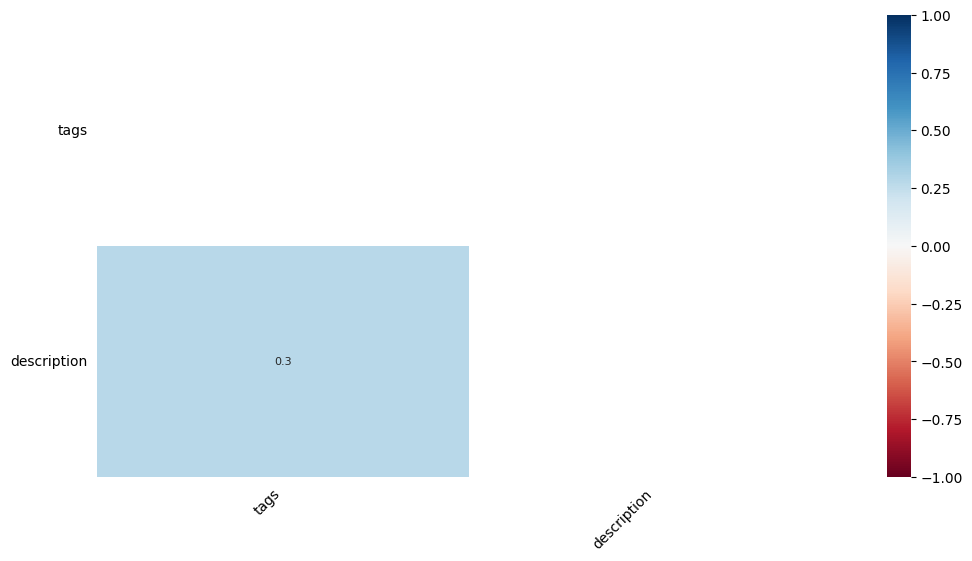

In [32]:
missingno.heatmap(df, figsize=(12,6), fontsize=10);

In [82]:
# Pengecekan Nan values pada kedua kolom
df[(df['tags'].isna()==True) & (df['description'].isna()==True)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   video_id                0 non-null      object         
 1   trending_date           0 non-null      datetime64[ns] 
 2   title                   0 non-null      object         
 3   channel_title           0 non-null      object         
 4   category_id             0 non-null      int64          
 5   publish_time            0 non-null      datetime64[ns] 
 6   tags                    0 non-null      object         
 7   views                   0 non-null      int64          
 8   likes                   0 non-null      float64        
 9   dislikes                0 non-null      int64          
 10  comment_count           0 non-null      int64          
 11  thumbnail_link          0 non-null      object         
 12  comments_disabled       0 non-null      bool    

#### Terdapat 275 rows data pada kolom tags dan description yang keduanya berisi Nan values

In [34]:
df[(df['tags'].isna()==True) & (df['description'].isna()==True)]['views']

104        49472
119        84038
129        15117
138        88992
147        20201
          ...   
40086    2011949
40090    2542806
40095    2761070
40102    2851205
40108    2894540
Name: views, Length: 275, dtype: int64

In [35]:
df[(df['tags'].isna()==True) | (df['description'].isna()==True)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1828 entries, 12 to 40821
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                1828 non-null   object
 1   trending_date           1828 non-null   object
 2   title                   1828 non-null   object
 3   channel_title           1828 non-null   object
 4   category_id             1828 non-null   int64 
 5   publish_time            1828 non-null   object
 6   tags                    294 non-null    object
 7   views                   1828 non-null   int64 
 8   likes                   1828 non-null   int64 
 9   dislikes                1828 non-null   int64 
 10  comment_count           1828 non-null   int64 
 11  thumbnail_link          1828 non-null   object
 12  comments_disabled       1828 non-null   bool  
 13  ratings_disabled        1828 non-null   bool  
 14  video_error_or_removed  1828 non-null   bool  
 15  de

In [36]:
df[(df['tags'].isna()==True) | (df['description'].isna()==True)]['views']

12       358597
15         2259
24        48372
33        52607
41        49915
          ...  
40809     73649
40818    225051
40819    267065
40820    281983
40821    295068
Name: views, Length: 1828, dtype: int64

#### Meskipun korelasi antara Nan values lemah, yaitu sebesar 0.3 dan tersebar secara acak. Akan tetapi apabila kita menghilangkan nilai Nan pada rows yang berisikan Nan values, itu akan menghilangkan total 1828 rows yang mana terdapat video dengan total views lebih dari 2 juta views. Oleh karena itu lebih baik mengisikan Nan values dengan 'none'.

In [37]:
df=df.fillna('None')
df.isna().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
category                  0
dtype: int64

#### Setelah Nan values diisi dengan 'none', jumlah dari missing values pada data sudah tidak ada

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40901 entries, 0 to 40900
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  thumbnail_link          40901 non-null  object
 12  comments_disabled       40901 non-null  bool  
 13  ratings_disabled        40901 non-null  bool  
 14  video_error_or_removed  40901 non-null  bool  
 15  de

In [39]:
display(df.describe(),df.describe(include=object))

,category_id,views,likes,dislikes,comment_count
count,40901.000000,4.090100e+04,4.090100e+04,4.090100e+04,4.090100e+04
mean,19.970588,2.360678e+06,7.427173e+04,3.711722e+03,8.448567e+03
std,7.569362,7.397719e+06,2.289999e+05,2.904624e+04,3.745139e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.419720e+05,5.416000e+03,2.020000e+02,6.130000e+02
50%,24.000000,6.810640e+05,1.806900e+04,6.300000e+02,1.855000e+03
75%,25.000000,1.821926e+06,5.533800e+04,1.936000e+03,5.752000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,category
count,40901,40901,40901,40901,40901,40901,40901,40901,40901
unique,6343,205,6343,2207,6269,6055,6352,6902,16
top,XiHiW4N7-bo,17.14.11,Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures,ESPN,2018-05-18T14:00:04.000Z,None,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,None,Entertainment
freq,29,200,29,202,50,1534,29,569,9944


## Recasting Form Data & Additional Insight Columns

In [40]:
from datetime import datetime

#### Pada data informasi dataset sebelumnya, kolom trending date dan juga publish time masih dalam tipe obeject, oleh karena itu data dari keduanya harus di recasting menjadi format datetime agar dapat membantu dalam proses analisis

In [41]:
# Recasting trending_date menjadi datetime
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce',format='%y.%d.%m')
df['trending_date']

0       2017-11-14
1       2017-11-14
2       2017-11-14
3       2017-11-14
4       2017-11-14
           ...    
40896   2018-06-02
40897   2018-06-03
40898   2018-06-04
40899   2018-06-05
40900   2018-06-06
Name: trending_date, Length: 40901, dtype: datetime64[ns]

In [42]:
# Recasting publish_time menjadi datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')
df['publish_time']

0       2017-11-13 17:13:01
1       2017-04-21 06:47:32
2       2017-11-11 15:00:03
3       2017-11-11 18:08:04
4       2017-11-11 01:19:33
                ...        
40896   2018-05-10 21:01:22
40897   2018-05-10 21:01:22
40898   2018-05-10 21:01:22
40899   2018-05-10 21:01:22
40900   2018-05-10 21:01:22
Name: publish_time, Length: 40901, dtype: datetime64[ns]

In [43]:
# Membuat kolom waktu jam, bulan, hari dan tahun publish video
df['publish_time_hour'] = df['publish_time'].dt.hour #jam
df['publish_time_month'] = df['publish_time'].dt.month_name() # bulam
df['publish_time_day'] = df['publish_time'].dt.day_name() # hari
df['publish_time_year'] = df['publish_time'].dt.year # tahun

In [44]:
# Menambah kolom lama waktu trending dari video pertama di upload sampai waktunya trending
df['trending_period'] = (df['trending_date'].dt.date) - (df['publish_time'].dt.date)

In [45]:
# Mensplit tags, yang nantinya akan dihitung per tags tiap video
df['tags'] = df['tags'].str.split('|')
df['tags'] = df['tags'].fillna({i: [] for i in df.index})

In [46]:
# Menambahkan kolom tags count yang berisi jumlah tags pada setiap video
df['tag_count'] = df['tags'].apply(lambda x: 0 if x is None else len(x))

In [47]:
df_ratio = df

In [48]:
# Menambahkan kolom baru likes_rate dan interaction_rate
df_ratio.drop(df_ratio[df_ratio['comment_count'] == 0].index, inplace=True)
df_ratio['likes'] = df_ratio['likes'].apply(lambda x: np.nan if x == 0 else x)
df_ratio.drop(df_ratio[df_ratio['likes'].isna()].index, inplace=True)
df_ratio['likes_rate'] = df_ratio['likes']/df_ratio['views']*100
df_ratio['interaction_rate'] = df_ratio['comment_count']/df_ratio['views']*100

In [49]:
engagement = []
for i in range(len(df_ratio)):
    if (df_ratio['likes_rate'].iloc[i] >= 4) and (df_ratio['interaction_rate'].iloc[i] >= 0.5):
        engagement.append('high engagement')
    else:
        engagement.append('low engagement')
df_ratio['engagement'] = engagement

#### Tingkat ratio tinggi rendahnya sebuah engagement dapat ditentukan dengan likes_rate dan juga interaction_rate dengan masing-masing persentase likes_rate > 4% dan interaction rate > 0.5%. Sumber: https://tubularlabs.com/blog/3-metrics-youtube-success/


In [50]:
df.groupby('engagement')['video_id'].count(), len(df)

(engagement
 high engagement     6715
 low engagement     33364
 Name: video_id, dtype: int64,
 40079)

#### Setelah dilakukan filtering berupa tinggi rendahnya sebuah engagement, didapatkan 6715 video memiliki engagement yang tinggi dengan likes_rate > 4% dan juga interaction_rate > 0.5%.

In [51]:
df.head(1).transpose()

,0
video_id,2kyS6SvSYSE
trending_date,2017-11-14 00:00:00
title,WE WANT TO TALK ABOUT OUR MARRIAGE
channel_title,CaseyNeistat
category_id,22
publish_time,2017-11-13 17:13:01
tags,[SHANtell martin]
views,748374
likes,57527.0
dislikes,2966


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40079 entries, 0 to 40900
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   video_id                40079 non-null  object         
 1   trending_date           40079 non-null  datetime64[ns] 
 2   title                   40079 non-null  object         
 3   channel_title           40079 non-null  object         
 4   category_id             40079 non-null  int64          
 5   publish_time            40079 non-null  datetime64[ns] 
 6   tags                    40079 non-null  object         
 7   views                   40079 non-null  int64          
 8   likes                   40079 non-null  float64        
 9   dislikes                40079 non-null  int64          
 10  comment_count           40079 non-null  int64          
 11  thumbnail_link          40079 non-null  object         
 12  comments_disabled       40079 no

## Exploratory Data Analysis

Setelah sudah melakukan tahap cleaning data, kita dapat mulai melakukan analisis pada data. Kita akan mencari tahu Bagaimanakah karakteristik dari kategori video, channel ataupun video yang menjadi trending, dan faktor apa sajakah yang mempengaruhi hal tersebut? Dari pertanyaan inilah muncul beberapa pertanyaan yang dapat kita analisis, antara lain:
1. Seberapa tinggi tingkat korelasi antara views, komentar dan likes?
2. Kategori video manakah yang mempunyai peringkat tertinggi dari banyak, likes, komentar, dan dislikes?
3. Channel youtube mana yang memiliki video trending paling banyak, likes, komentar, dan dislikes?
4. Video manakah yang memiliki paling banyak, likes, komentar, dan dislikes?
5. Keyword yang paling sering digunakan pada tags dan judul video?

### Correlation Data

In [54]:
df_corr = df[["views","likes", "dislikes", "comment_count", "likes_rate", "interaction_rate", "tag_count"]].corr(method="pearson")
df_corr

,views,likes,dislikes,comment_count,likes_rate,interaction_rate,tag_count
views,1.000000,0.854227,0.474846,0.621471,-0.035905,-0.049647,-0.029480
likes,0.854227,1.000000,0.447333,0.803036,0.177963,0.067483,-0.054391
dislikes,0.474846,0.447333,1.000000,0.700676,-0.001951,0.089145,-0.000046
comment_count,0.621471,0.803036,0.700676,1.000000,0.128633,0.245789,-0.020256
likes_rate,-0.035905,0.177963,-0.001951,0.128633,1.000000,0.423293,-0.040825
interaction_rate,-0.049647,0.067483,0.089145,0.245789,0.423293,1.000000,-0.024877
tag_count,-0.029480,-0.054391,-0.000046,-0.020256,-0.040825,-0.024877,1.000000


Alasan menggunakan korelasi Pearson. Korelasi Pearson Product Moment adalah korelasi yang digunakan untuk data kontinu dan data diskrit. Korelasi pearson cocok digunakan untuk statistik parametrik. Ketika data berjumlah besar dan memiliki ukuran parameter seperti mean dan standar deviasi populasi. Korelasi Pearson menghitung korelasi dengan menggunakan variansi data. Keragaman data tersebut dapat menunjukkan korelasinya. 

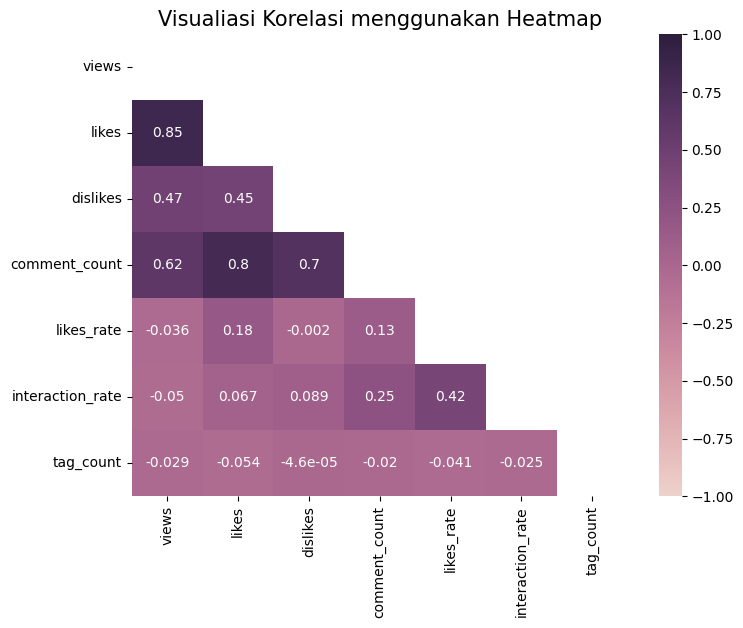

In [55]:
mask = np.triu(np.ones_like(df_corr))
plt.figure(figsize=(8,6))
plt.title("Visualiasi Korelasi menggunakan Heatmap", size=15)
sns.heatmap(df_corr, mask=mask, vmax=1,vmin=-1, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

Analisis: Dapat dilihat bahwa views dan likes memiliki memiliki nilai korelasi yang tinggi yaitu 0.85, hal ini menunjukan bahwa kemungkinan sebuah video yang memiliki niali views dan juga likes lebih banyak, maka semakin berpeluang video tersebut akan trending. 

### Category Video Trending

Text(0, 0.5, 'Kategori Video')

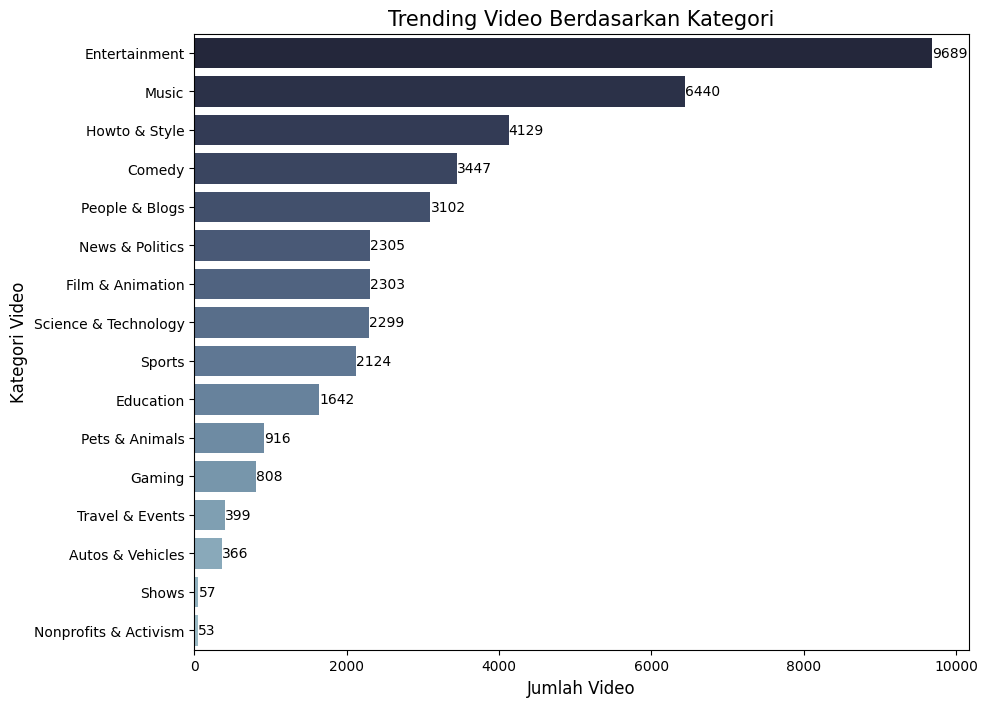

In [56]:
trending_channel=df.groupby('category').size().reset_index(name='video_count') \
    .sort_values('video_count', ascending=False).head(20)

fig, ax = plt.subplots(figsize=(10,8))
g= sns.barplot(x='video_count', y='category', data=trending_channel,
                palette=sns.cubehelix_palette(rot=-.2, n_colors=20, reverse=True), ax=ax)
ax.bar_label(ax.containers[0])
g.set_title('Trending Video Berdasarkan Kategori', fontsize=15)
g.set_xlabel('Jumlah Video', fontsize=12)
g.set_ylabel('Kategori Video', fontsize=12)

In [57]:
vlc = df
vlc = vlc.groupby('category')[['views', 'likes', 'dislikes','comment_count']].apply(lambda x: x.astype(int).sum())
vlc = vlc.sort_values(by='likes', ascending=False).reset_index()
vlc

,category,views,likes,dislikes,comment_count
0,Music,40052642740,1416530176,51170573,125238135
1,Entertainment,20076359713,521733812,42621965,73438463
2,Comedy,5111241846,216136228,7219899,22496604
3,People & Blogs,4402813350,185764596,9720352,24745163
4,Film & Animation,7231676736,165240945,5975621,17877352
5,Howto & Style,4061169369,162515866,5462302,23095757
6,Sports,4358351418,97678133,5108136,11189203
7,Science & Technology,3197187718,79342885,3874011,11954536
8,Gaming,2122626053,68673093,9146306,14720836
9,Education,1179907194,49246969,1351574,5440632


In [58]:
level_eng=pd.crosstab(df['category'], df['engagement'])
level_eng['total']=level_eng.sum(axis=1)
level_eng.sort_values('total', ascending=False).head()


engagement,high engagement,low engagement,total
category,,,
Entertainment,1171,8518,9689
Music,1277,5163,6440
Howto & Style,1129,3000,4129
Comedy,918,2529,3447
People & Blogs,757,2345,3102


Analisis: Disini ditemukan fakta menarik, meskipun dengan jumlah views like dan comment terbanyak, video dengan kategori Music tidak menjadi top trending pertama akan tetapi kategori Entertainment yang menjadi puncak video kategori trending. Hal ini diasumsikan karena rasio banyaknya jumlah video pada kategori Entertainment. Berdasarkan pengelompokan data yang dilakukan berdasarkan kategori, kategori Entertainment memiliki video paling banyak masuk trending list, diikuti dengan Music dan Howto & Style. Kategori yang paling sedikit masuk trending list adalah kategori Shows dan Nonprofits & Activism

### Most Channel Trending

Text(0, 0.5, 'Nama Channel')

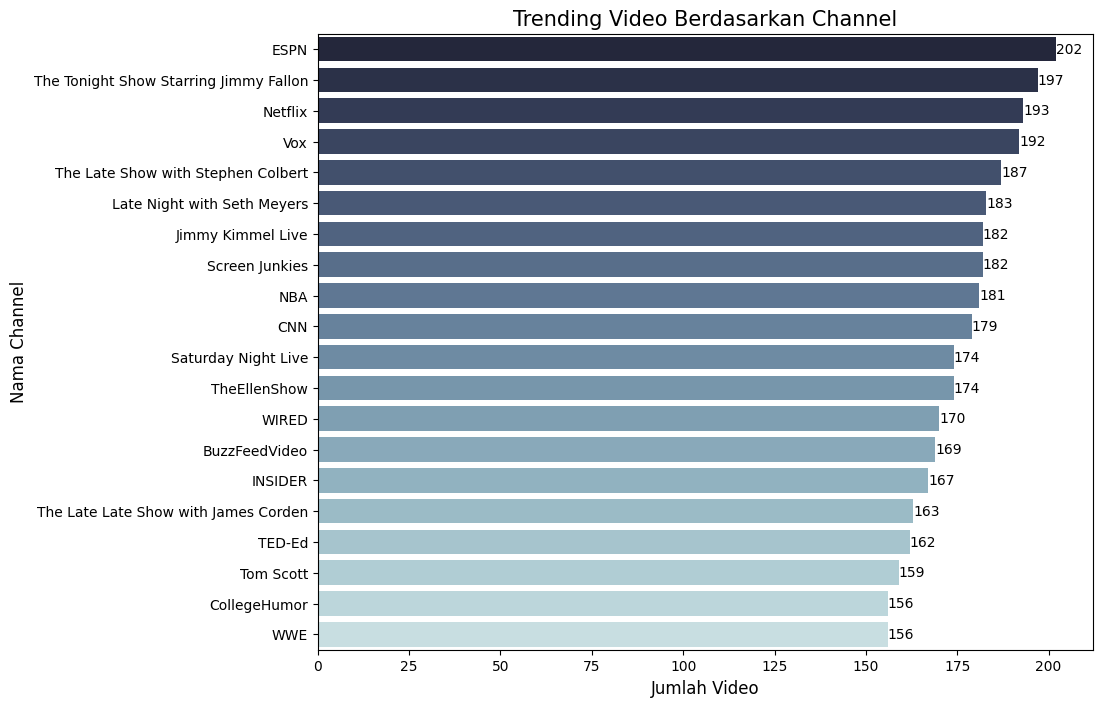

In [59]:
trending_channel=df.groupby('channel_title').size().reset_index(name='video_count') \
    .sort_values('video_count', ascending=False).head(20)

fig, ax = plt.subplots(figsize=(10,8))
g= sns.barplot(x='video_count', y='channel_title', data=trending_channel,
                palette=sns.cubehelix_palette(rot=-.2, n_colors=20, reverse=True), ax=ax)
ax.bar_label(ax.containers[0])
g.set_title('Trending Video Berdasarkan Channel', fontsize=15)
g.set_xlabel('Jumlah Video', fontsize=12)
g.set_ylabel('Nama Channel', fontsize=12)

In [60]:
print('ESPN rata-rata mengupload video sebanyak ' + str(len(df[df['channel_title'] == 'ESPN'].groupby('publish_time').mean())) + ' video dalam waktu 205 hari')
print('Netflix rata-rata mengupload video sebanyak ' + str(len(df[df['channel_title'] == 'Netflix'].groupby('publish_time').mean())) + ' video dalam waktu 205 hari')
print('CNN rata-rata mengupload video sebanyak ' + str(len(df[df['channel_title'] == 'CNN'].groupby('publish_time').mean())) + ' video dalam waktu 205 hari')

ESPN rata-rata mengupload video sebanyak 84 video dalam waktu 205 hari
Netflix rata-rata mengupload video sebanyak 58 video dalam waktu 205 hari
CNN rata-rata mengupload video sebanyak 52 video dalam waktu 205 hari


Analisis: Tingkat dari konsistensi dan juga frekuensi dalam mengupload sebuah konten video sangatlah berpengaruh dengan tingkat trending dari sebuah channel youtube. Selain itu, sebuah channel yotube yang menjadi trending memiliki jumlah video trending yang banyak.

### Most Trending Video

#### The Most High Engagement

In [61]:
mvt=pd.crosstab(df['title'], df['engagement'])
mvt.sort_values('high engagement', ascending=False)

engagement,high engagement,low engagement
title,,
Why I'm So Scared (being myself and crying too much),28,0
22 Years of Life Milestone,27,0
We Bought A House,27,0
BTS Plays With Puppies While Answering Fan Questions,25,0
LIGHTS OUT CHALLENGE IN FAZE RUG'S HAUNTED HOUSE | OmarGoshTV,25,0
...,...,...
How To Make an Ocarina of Time IRL,0,6
How To Make a Pink Construction Hat out of Vanilla CAKE! | Yolanda Gampp | How To Cake It,0,13
How To Make a Mega Metal Foundry,0,8


In [62]:
top_eng=df[df['title']=="Why I'm So Scared (being myself and crying too much)"][['views', 'likes', 'comment_count','likes_rate','interaction_rate']]
top_eng.head()

,views,likes,comment_count,likes_rate,interaction_rate
38615,1469627,188652.0,33032,12.836727,2.247645
38631,2806454,264364.0,45967,9.419859,1.637903
38651,3169706,280422.0,48789,8.846940,1.539228
38674,3305195,286754.0,49938,8.675857,1.510894
38695,3388949,290270.0,50410,8.565192,1.487482


#### The Most Views

In [63]:
bs_view=df.groupby(['title','category'])[['views', 'likes', 'dislikes', 'comment_count']].sum().sort_values('views', ascending=False)[:10].reset_index()
bs_view

,title,category,views,likes,dislikes,comment_count
0,Childish Gambino - This Is America (Official Video),Music,3758488765,96700818.0,6054434,10151289
1,Ariana Grande - No Tears Left To Cry,Music,1529291326,49451353.0,1877988,4143608
2,BTS (방탄소년단) 'FAKE LOVE' Official MV,Music,1283188291,71835050.0,2389776,15568561
3,"Becky G, Natti Natasha - Sin Pijama (Official Video)",Music,1182971286,19185287.0,1616616,1176862
4,VENOM - Official Trailer (HD),Entertainment,1003151226,23339807.0,831784,2533352
5,"Cardi B, Bad Bunny & J Balvin - I Like It [Official Music Video]",Music,896558471,23078293.0,1233979,1370188
6,Selena Gomez - Back To You (Lyric Video),Film & Animation,818792483,20165850.0,346079,1002366
7,Maluma - Marinero (Official Video),Music,803455479,15314079.0,1065209,864473
8,"Calvin Harris, Dua Lipa - One Kiss (Official Video)",Music,792843004,12625269.0,520681,432008
9,YouTube Rewind: The Shape of 2017 | #YouTubeRewind,Entertainment,780801040,19781372.0,10111153,5898529


In [64]:
tv=df[df['title']=='Childish Gambino - This Is America (Official Video)'][['likes_rate','interaction_rate']]
tv.head()

,likes_rate,interaction_rate
30884,4.440517,0.472292
30921,3.904131,0.413030
30962,3.593053,0.382916
31002,3.375754,0.359492
31048,3.215295,0.340434


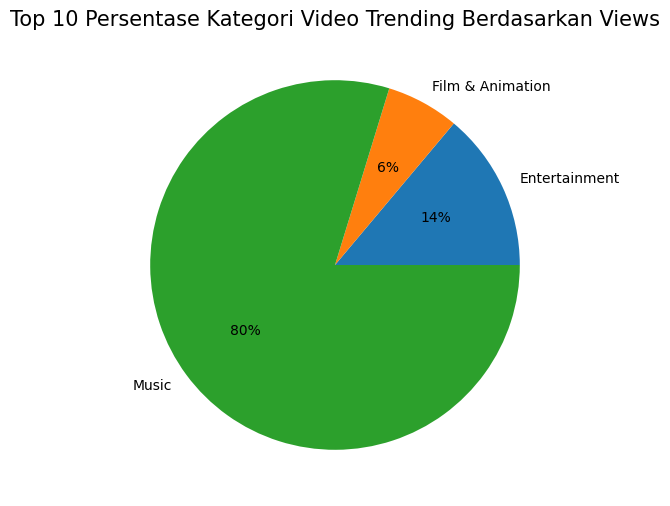

In [65]:
plt.figure(figsize=(6,6),facecolor='white')
plt.title('Top 10 Persentase Kategori Video Trending Berdasarkan Views', size=15)
plt.pie(
    x= bs_view.groupby('category')[['views']].sum().reset_index()['views'],            
    labels= bs_view.groupby('category')[['views']].sum().reset_index()['category'],    
    autopct='%1.f%%',                   
    textprops={'fontsize': 10}
)
plt.show()

#### The Most Likes

In [66]:
bs_likes=df.groupby(['title','category'])[['views', 'likes', 'dislikes', 'comment_count']].sum().sort_values('likes', ascending=False)[:10].reset_index()
bs_likes

,title,category,views,likes,dislikes,comment_count
0,Childish Gambino - This Is America (Official Video),Music,3758488765,96700818.0,6054434,10151289
1,BTS (방탄소년단) 'FAKE LOVE' Official MV,Music,1283188291,71835050.0,2389776,15568561
2,Ariana Grande - No Tears Left To Cry,Music,1529291326,49451353.0,1877988,4143608
3,Taylor Swift - Delicate,Music,728576946,24868764.0,1413970,2210876
4,VENOM - Official Trailer (HD),Entertainment,1003151226,23339807.0,831784,2533352
5,"Cardi B, Bad Bunny & J Balvin - I Like It [Official Music Video]",Music,896558471,23078293.0,1233979,1370188
6,BTS (방탄소년단) 'FAKE LOVE' Official MV (Extended ver.),Music,138056591,22622742.0,135878,1979067
7,BTS (방탄소년단) 'Euphoria : Theme of LOVE YOURSELF 起 Wonder',Music,165689328,22470914.0,174332,2415111
8,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity' Comeback Trailer,Music,195355414,22189964.0,213286,3114441
9,j-hope 'Airplane' MV,Music,124268512,21994730.0,126822,2271161


In [67]:
tv=df[df['title']=='Childish Gambino - This Is America (Official Video)'][['likes_rate','interaction_rate']]
tv.head()

,likes_rate,interaction_rate
30884,4.440517,0.472292
30921,3.904131,0.413030
30962,3.593053,0.382916
31002,3.375754,0.359492
31048,3.215295,0.340434


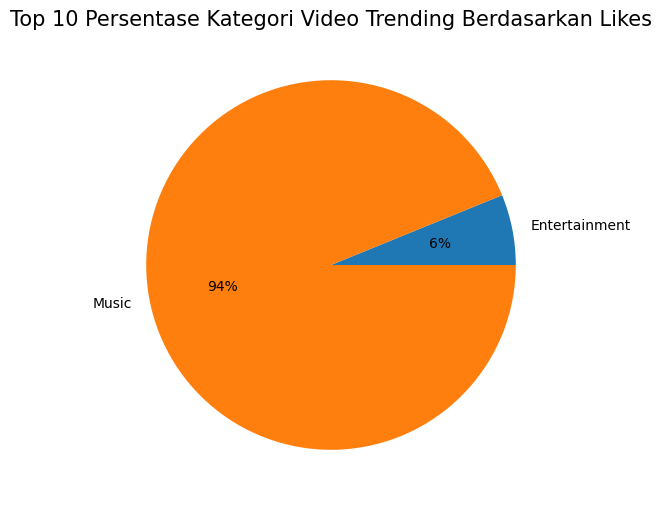

In [68]:
plt.figure(figsize=(6,6),facecolor='white')
plt.title('Top 10 Persentase Kategori Video Trending Berdasarkan Likes', size=15)
plt.pie(
    x= bs_likes.groupby('category')[['likes']].sum().reset_index()['likes'],            
    labels= bs_likes.groupby('category')[['likes']].sum().reset_index()['category'],    
    autopct='%1.f%%',                   
    textprops={'fontsize': 10}
)
plt.show()

#### The Most Dislikes

In [69]:
bs_cc=df.groupby(['title','category'])[['views', 'likes', 'dislikes', 'comment_count']].sum().sort_values('dislikes', ascending=False)[:10].reset_index()
bs_cc

,title,category,views,likes,dislikes,comment_count
0,YouTube Rewind: The Shape of 2017 | #YouTubeRewind,Entertainment,780801040,19781372.0,10111153,5898529
1,So Sorry.,Entertainment,204298706,8495733.0,9192539,8190045
2,Childish Gambino - This Is America (Official Video),Music,3758488765,96700818.0,6054434,10151289
3,Official Call of Duty®: Black Ops 4 — Multiplayer Reveal Trailer,Gaming,243774929,8844405.0,5240006,3590220
4,Suicide: Be Here Tomorrow.,Nonprofits & Activism,157627870,14271026.0,3239399,4710338
5,BTS (방탄소년단) 'FAKE LOVE' Official MV,Music,1283188291,71835050.0,2389776,15568561
6,Ariana Grande - No Tears Left To Cry,Music,1529291326,49451353.0,1877988,4143608
7,Katy Perry - Hey Hey Hey (Official),Music,267531344,8404683.0,1658814,867905
8,"Becky G, Natti Natasha - Sin Pijama (Official Video)",Music,1182971286,19185287.0,1616616,1176862
9,TWICE What is Love? M/V,Music,774320575,17322894.0,1534546,3172060


#### The Most Comment_count

In [70]:
bs_cc=df.groupby(['title','category'])[['views', 'likes', 'dislikes', 'comment_count']].sum().sort_values('comment_count', ascending=False)[:10].reset_index()
bs_cc

,title,category,views,likes,dislikes,comment_count
0,BTS (방탄소년단) 'FAKE LOVE' Official MV,Music,1283188291,71835050.0,2389776,15568561
1,Childish Gambino - This Is America (Official Video),Music,3758488765,96700818.0,6054434,10151289
2,So Sorry.,Entertainment,204298706,8495733.0,9192539,8190045
3,YouTube Rewind: The Shape of 2017 | #YouTubeRewind,Entertainment,780801040,19781372.0,10111153,5898529
4,Suicide: Be Here Tomorrow.,Nonprofits & Activism,157627870,14271026.0,3239399,4710338
5,Ariana Grande - No Tears Left To Cry,Music,1529291326,49451353.0,1877988,4143608
6,Official Call of Duty®: Black Ops 4 — Multiplayer Reveal Trailer,Gaming,243774929,8844405.0,5240006,3590220
7,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Official MV,Music,188052671,17388770.0,273225,3509630
8,TWICE What is Love? M/V,Music,774320575,17322894.0,1534546,3172060
9,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity' Comeback Trailer,Music,195355414,22189964.0,213286,3114441


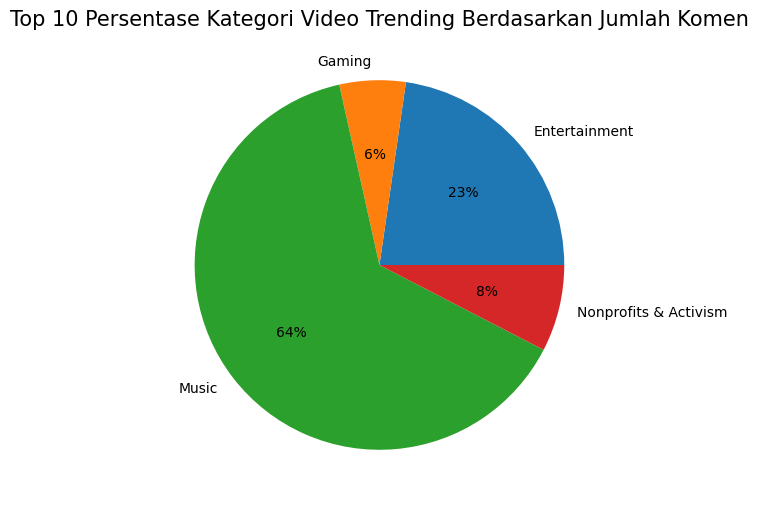

In [71]:
plt.figure(figsize=(6,6),facecolor='white')
plt.title('Top 10 Persentase Kategori Video Trending Berdasarkan Jumlah Komen', size=15)
plt.pie(
    x= bs_cc.groupby('category')[['comment_count']].sum().reset_index()['comment_count'],            
    labels= bs_cc.groupby('category')[['comment_count']].sum().reset_index()['category'],    
    autopct='%1.f%%',                   
    textprops={'fontsize': 10}
)
plt.show()

Berdasarkan The Most Views, Likes dan Comment. Video dengan judul “Childish Gambino - This Is America (Official Video)” selalu menempati posisi 3 teratas. Hal ini membuktikan bahwa korelasi antara views, likes dan comment memiliki korelasi yang tinggi dalam menentukan sebuah video trending atau tidak. Serta Kategori Music & Entertainment selalu di urutan teratas.


### Time to Publish Video

#### Upload By Month

In [72]:
time_upl_month = df.groupby("publish_time_month")[["channel_title"]].count().reset_index()
time_upl_month  = time_upl_month.sort_values("channel_title",ascending=False)
time_upl_month

,publish_time_month,channel_title
8,May,6529
3,February,6095
7,March,6081
2,December,6025
4,January,5374
0,April,5040
9,November,4088
6,June,747
10,October,40
11,September,26


Text(0, 0.5, 'Waktu Upload (Bulan)')

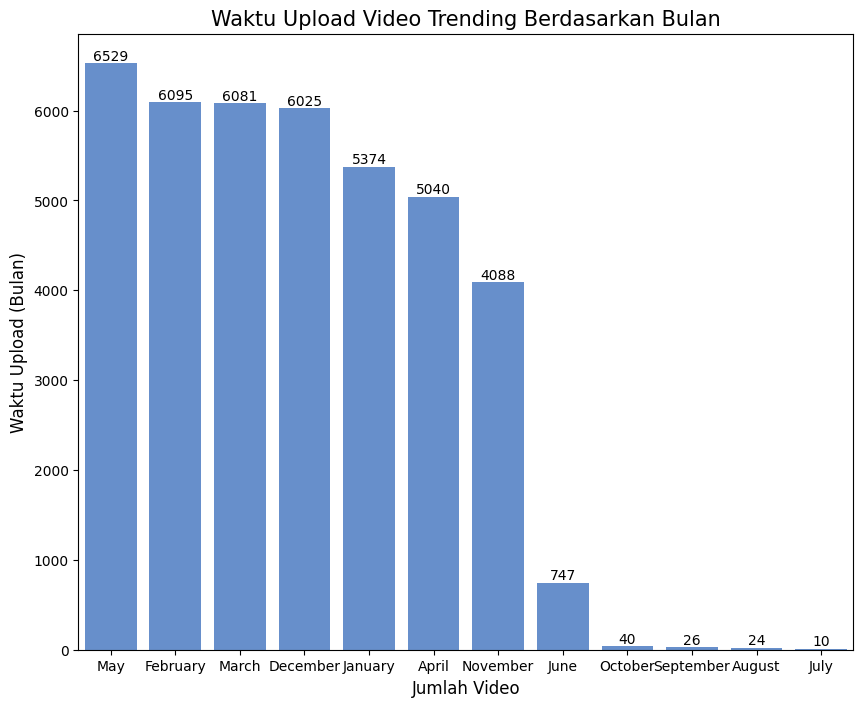

In [73]:
fig, ax = plt.subplots(figsize=(10,8))
g= sns.barplot(x='publish_time_month', y='channel_title', data=time_upl_month,
                palette=sns.hls_palette(h=.6, n_colors=1), ax=ax)
ax.bar_label(ax.containers[0])
g.set_title('Waktu Upload Video Trending Berdasarkan Bulan', fontsize=15)
g.set_xlabel('Jumlah Video', fontsize=12)
g.set_ylabel('Waktu Upload (Bulan)', fontsize=12)

#### Upload By Day

In [74]:
# melihat waktu upload video yang trending berdasarkan hari
time_upl_day = df.groupby("publish_time_day")[["channel_title"]].count().reset_index()
time_upl_day  = time_upl_day.sort_values("channel_title",ascending=False)
time_upl_day

,publish_time_day,channel_title
0,Friday,6892
4,Thursday,6817
5,Tuesday,6685
6,Wednesday,6611
1,Monday,6012
3,Sunday,3556
2,Saturday,3506


Text(0, 0.5, 'Jumlah Video')

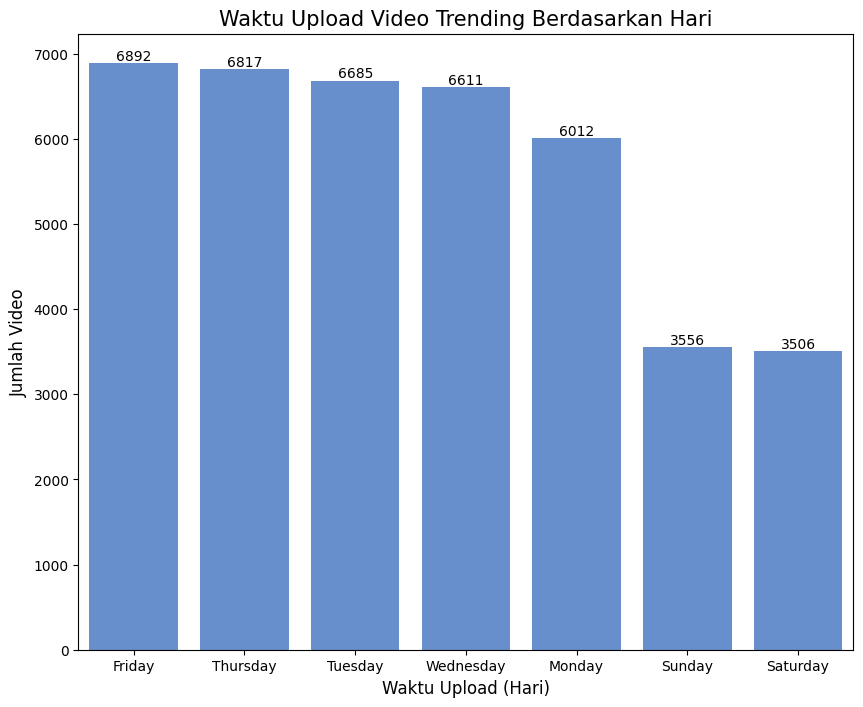

In [75]:
fig, ax = plt.subplots(figsize=(10,8))
g= sns.barplot(x='publish_time_day', y='channel_title', data=time_upl_day,
                palette=sns.hls_palette(h=.6, n_colors=1), ax=ax)
ax.bar_label(ax.containers[0])
g.set_title('Waktu Upload Video Trending Berdasarkan Hari', fontsize=15)
g.set_xlabel('Waktu Upload (Hari)', fontsize=12)
g.set_ylabel('Jumlah Video', fontsize=12) 

#### Upload By Hour

In [76]:
# melihat video yang trending berdasarkan jam upload
time_upl_hrs = df.groupby("publish_time_hour")[["channel_title"]].count().reset_index()
time_upl_hrs = time_upl_hrs.sort_values("channel_title", ascending=False).reset_index().drop(columns = {'index'})
time_upl_hrs

,publish_time_hour,channel_title
0,16,3617
1,15,3455
2,17,3405
3,18,2826
4,14,2766
5,20,2064
6,13,2061
7,21,2055
8,19,2045
9,22,1925


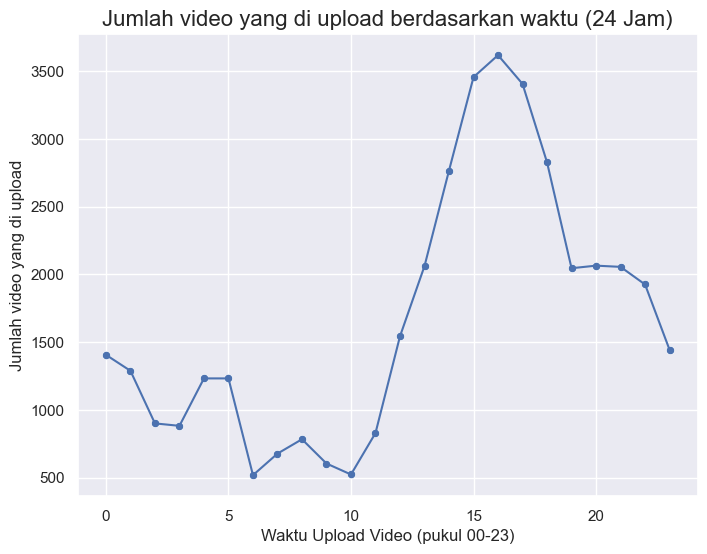

In [77]:
# visualisasi Jumlah video yang di upload berdasarkan waktu (24 Jam)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,6))
ax = sns.lineplot(y=time_upl_hrs["channel_title"], x=time_upl_hrs["publish_time_hour"])
sns.scatterplot(y=time_upl_hrs["channel_title"], x=time_upl_hrs["publish_time_hour"])
plt.title("Jumlah video yang di upload berdasarkan waktu (24 Jam)", size=16)
plt.xlabel("Waktu Upload Video (pukul 00-23)")
plt.ylabel("Jumlah video yang di upload")
plt.show()

Bulan Mei, March dan Desember merupakan bulan terbanyak creator mengupload videonya, dan juga pada hari Jumat, Kamis, dan Selasa menjadi hari terbanyak, serta pukul 15.00 - 17.00 menjadi waktu dengan list video trending terbanyak. 


### Time to Trending

In [78]:
ttt = df.groupby("video_id")[["category","trending_period"]].min().reset_index()
display(ttt, ttt.describe())

,video_id,category,trending_period
0,-0CMnp02rNY,Entertainment,2 days
1,-0NYY8cqdiQ,Entertainment,3 days
2,-1Hm41N0dUs,Comedy,2 days
3,-1yT-K3c6YI,People & Blogs,1 days
4,-2RVw2_QyxQ,Education,2 days
...,...,...,...
6195,zwEn-ambXLw,Music,4 days
6196,zxUwbflE1SY,Entertainment,2 days
6197,zxwfDlhJIpw,People & Blogs,1 days
6198,zy0b9e40tK8,Entertainment,5 days


,trending_period
count,6200
mean,21 days 16:53:06.580645161
std,208 days 07:52:49.743011408
min,0 days 00:00:00
25%,1 days 00:00:00
50%,2 days 00:00:00
75%,3 days 00:00:00
max,4215 days 00:00:00


Analisis: Pada tabel diatas dapat dikatakan bahwa 75% data memiliki waktu trending 1-3 hari, artinya video yang masuk pada list trending mayoritas video baru. Video dengan waktu trending yang paling lama pada dataset ini adalah 4215 hari, hal ini juga sejalan dengan apa yang dikatakan oleh youtube bahwa video yang trending tidak terbatas oleh umur video, video yang sudah diupload dalam waktu yang lama juga punya kemungkinan masuk list trending.

### Word Cloud

In [79]:
from wordcloud import WordCloud, STOPWORDS

#### Karakter atau Kata yang Sering Muncul Pada Tittle

Dengan menyesuaikan keyword/tags tertinggi pada pencarian, hal ini meningkatkan kemungkinan video masuk kedalam trending. 


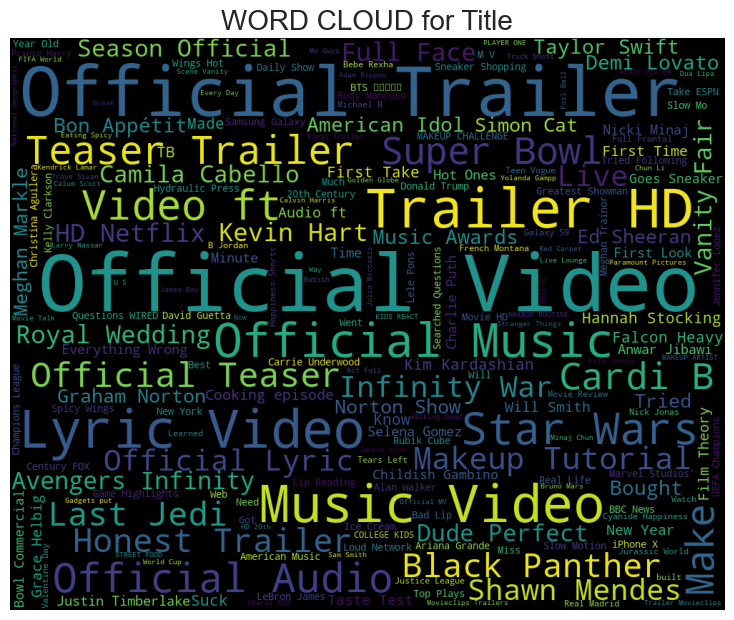

In [80]:
data_title = ''
stopwords = set(STOPWORDS)

for i in df["title"]:
    i = str(i)
    tokens = i.split()
    data_title += " ".join(tokens)+" "
    for j in range(len(tokens)):
        tokens[j] = tokens[j].lower()

wordcloud = WordCloud(width=1000, height=800,stopwords=stopwords,min_font_size=10).generate(data_title)

plt.figure(figsize=(12, 6), facecolor=None)
plt.imshow(wordcloud)
plt.title("WORD CLOUD for Title", fontsize = 20)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Karakter atau Kata yang Sering Muncul Pada Kata

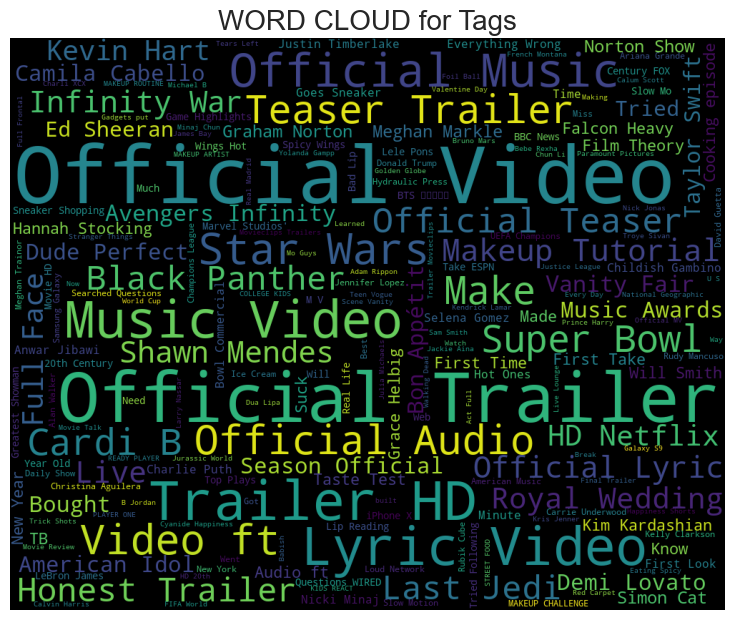

In [81]:
tags_data = ''
stopwords = set(STOPWORDS)

for i in df["title"]:
    i = str(i)
    tokens = i.split()
    tags_data += " ".join(tokens)+" "
    for j in range(len(tokens)):
        tokens[j] = tokens[j].lower()

wordcloud = WordCloud(width=1000, height=800,stopwords=stopwords,min_font_size=10).generate(tags_data)

plt.figure(figsize=(12, 6), facecolor=None)
plt.imshow(wordcloud)
plt.title("WORD CLOUD for Tags", fontsize = 20)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Kesimpulan
- Tingkat korelasi views, like, komen yang tinggi sangat berpengaruh terhadap trending tidaknya suatu video.
- Rasio engagement ditentukan oleh likes_rate dan juga interaction_rate dengan masing-masing persentase likes_rate lebih dari 4% dan interaction rate > 0.5%.
- Entertainment, music, dan Howto & Style, karena banyaknya video yang trending pada kategori tersebut serta tingkat engagement yang tinggi.
- ESPN menempati urutan tertinggi dari channel lainnya dengan jumlah video trending sebanyak 202 video. Hal ini sangatlah berbanding lurus dengan frekuensi & konsistensi dalam mengupload video.
- Berdasarkan video, kategori music dan entertainment selalu mendominasi menjadi urutan yang paling teratas dengan jumlah like, views dan komen terbanyak. Hal ini sangatlah berkorelasi dengan perilaku audiens karena pada kategori music, audiens akan cenderung memutar musik video berulang kali.
- Bulan Mei, March dan Desember merupakan bulan terbanyak creator mengupload videonya, dan juga pada hari Jumat, Kamis, dan Selasa menjadi hari terbanyak, serta pukul 15.00 - 17.00 menjadi waktu dengan list video trending terbanyak. Rentang waktu video yang dibutuhkan sampai dengan trending sekitar 0-3 hari dan rata-rata 19-21 hari.
- Dengan menyesuaikan keyword/tags tertinggi pada pencarian, hal ini meningkatkan kemungkinan video masuk kedalam trending. 


### Rekomendasi
- Lakukan riset lebih mendalam ketertarikan audiens terhadap kategori video tertentu serta menentukan target market yang dituju.
- Upload video secara konsisten hal ini dapat memperbesar peluang sebuah video dan channel youtube masuk ke dalam daftar trending.
- Buat konten video yang interaktif yang dapat mengundang engagement rate yang tinggi. Dengan begitu akan menarik bagi audiens untuk bisa menonton, likes dan komen.
- Pengoptimalan SEO untuk mendapatkan keyword yang relevan dan sesuai dengan pencarian audiens. Berikut rekomendasi pengoptimalan SEO:
    - Riset Keyword : Usahakan memerhatikan keyword yang sesuai dengan tema video kita dan punya volume pencarian yang tinggi.
    - Gunakan judul/title yang sesuai dengan tema video, usahakan gunakan thumbnail yang menarik.
    - Pasang keyword yang sudah ditentukan dalam deskripsi video.
    - Gunakan tags yang sesuai dengan judul, tema dan deksripsi video yang akan dibuat. Berdasarkan data jumlah tags yang direkomendasikan tags yang dapat di buat kurang lebih 19 tags.
    - Promosikan video secepat mungkin, lakukan promosi di platform social media lain. Dapat dilakukan dengan membuat short video atau share link pada social media lain. -Karena berdasarkan data, mayoritas video yang trending adalah video-video yang cenderung sangat baru. Kepecatan penambahan views inilah yang juga dapat membuat video kita masuk dalam trending list.
- Pemilihan hari dan jam upload sesuai.
